In [1]:
#!pip install seaborn

In [2]:
#!pip install openpyxl

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy                 as np
import geopandas             as gpd
import seaborn               as sns
import folium  #needed for interactive map
from folium.plugins import HeatMap
#%matplotlib inline
sns.set()

# Carga geojson

In [4]:
# file_path= 'D:/JUAN CAMILO/DS4A/Proyecto FInal/locashp/Loca.shp'
# file_path2='D:/JUAN CAMILO/DS4A/Proyecto FInal/Bases de Datos/Bases_limpias/HealthFacilities.csv'

filepath_Localidades = '../Mapas/poligonos-localidades.shp'
filepath_Health = '../Datasets Clean/HealthFacilities.csv'

In [5]:
MapaLocalidades = gpd.read_file(filepath_Localidades)
MapaLocalidades

,Nombre_de_l,Acto_admini,Area_de_la_,Identificad,geometry
0,SANTA FE,Acuerdo 117 de 2003,"45170645,863322",03,"POLYGON ((-73.99446 4.61425, -73.99446 4.61425..."
1,BARRIOS UNIDOS,Acuerdo 8 de 1977,"11903448,204872",12,"POLYGON ((-74.05725 4.68684, -74.06249 4.65594..."
2,FONTIBON,Acuerdo 8 de 1977,"33281002,494914",09,"POLYGON ((-74.10342 4.65351, -74.10750 4.64823..."
3,ENGATIVA,Acuerdo 8 de 1977,"35880967,349154",10,"POLYGON ((-74.15547 4.71798, -74.15547 4.71798..."
4,CANDELARIA,Acuerdo 117 de 2003,"2060242,920452",17,"POLYGON ((-74.06621 4.60317, -74.06620 4.60317..."
5,CHAPINERO,Acuerdo 8 de 1977,"38155857,205938",02,"POLYGON ((-74.01089 4.66358, -74.01104 4.66359..."
6,CIUDAD BOLIVAR,Acuerdo 14 de 1983,"130002593,080624",19,"POLYGON ((-74.18135 4.58892, -74.18162 4.58944..."
7,SUBA,Acuerdo 8 de 1977,"100560477,718254",11,"POLYGON ((-74.03450 4.82547, -74.03478 4.82418..."
8,RAFAEL URIBE URIBE,Acuerdo 117 de 2003,"13834084,806513",18,"POLYGON ((-74.12803 4.59254, -74.12777 4.59233..."
9,KENNEDY,Acuerdo 8 de 1977,"38589733,814235",08,"POLYGON ((-74.11830 4.63741, -74.11845 4.63727..."


In [6]:
dic_Localidades={'TEUSAQUILLO':'Teusaquillo',
                'USAQUEN':'Usaquén',
                'CHAPINERO':'Chapinero',
                'SANTA FE':'Santa Fe',
                'SAN CRISTOBAL':'San Cristobal',
                'USME':'Usme',
                'TUNJUELITO':'Tunjuelito',
                'BOSA':'Bosa',
                'KENNEDY':'Kennedy',
                'FONTIBON':'Fontibón',
                'ENGATIVA':'Engativá',
                'SUBA':'Suba',
                'BARRIOS UNIDOS':'Barrios Unidos',
                'TEUSAQUILLO':'Teusaquillo',
                'LOS MARTIRES':'Los Mártires',
                'ANTONIO NARIÑO':'Antonio Nariño',
                'ANTONIO NARIÃO':'Antonio Nariño', 
                'PUENTE ARANDA':'Puente Aranda',
                'CANDELARIA':'La Candelaria',
                'RAFAEL URIBE URIBE':'Rafael Uribe Uribe',
                'CIUDAD BOLIVAR':'Ciudad Bolivar',
                'SUMAPAZ':'Sumapaz'
}

In [7]:
Colsdict = {'Nombre_de_l' : 'Localidad', 'Acto_admini' : 'Acto_Administrativo',
            'Area_de_la_' : 'Area', 'Identificad' : 'ID_Number'}

MapaLocalidades.rename(columns=Colsdict,inplace = True)

MapaLocalidades['Localidad']=MapaLocalidades['Localidad'].replace(dic_Localidades)
#MapaLocalidades['geometry2']=MapaLocalidades['geometry']
MapaLocalidades

,Localidad,Acto_Administrativo,Area,ID_Number,geometry
0,Santa Fe,Acuerdo 117 de 2003,"45170645,863322",03,"POLYGON ((-73.99446 4.61425, -73.99446 4.61425..."
1,Barrios Unidos,Acuerdo 8 de 1977,"11903448,204872",12,"POLYGON ((-74.05725 4.68684, -74.06249 4.65594..."
2,Fontibón,Acuerdo 8 de 1977,"33281002,494914",09,"POLYGON ((-74.10342 4.65351, -74.10750 4.64823..."
3,Engativá,Acuerdo 8 de 1977,"35880967,349154",10,"POLYGON ((-74.15547 4.71798, -74.15547 4.71798..."
4,La Candelaria,Acuerdo 117 de 2003,"2060242,920452",17,"POLYGON ((-74.06621 4.60317, -74.06620 4.60317..."
5,Chapinero,Acuerdo 8 de 1977,"38155857,205938",02,"POLYGON ((-74.01089 4.66358, -74.01104 4.66359..."
6,Ciudad Bolivar,Acuerdo 14 de 1983,"130002593,080624",19,"POLYGON ((-74.18135 4.58892, -74.18162 4.58944..."
7,Suba,Acuerdo 8 de 1977,"100560477,718254",11,"POLYGON ((-74.03450 4.82547, -74.03478 4.82418..."
8,Rafael Uribe Uribe,Acuerdo 117 de 2003,"13834084,806513",18,"POLYGON ((-74.12803 4.59254, -74.12777 4.59233..."
9,Kennedy,Acuerdo 8 de 1977,"38589733,814235",08,"POLYGON ((-74.11830 4.63741, -74.11845 4.63727..."


<AxesSubplot:>

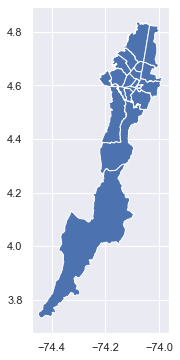

In [8]:
MapaLocalidades.plot(figsize=(12,6))

# Carga base TM

In [9]:
df_health = pd.read_csv(filepath_Health)
df_health

,id,iddepto,nomdepto,idmpio,nompio,codigohabilitacion,nombre,nitsnit,ese,direccion,direccionorig,telefono,najunombre,numerosedeprincipal,latitude,longitude
0,1,11,Bogotá D.C,11001,BOGOTÁ,"1,100,100,032",COOPERATIVA PARA LA SALUD ORAL ORALCOOP,"830,000,001",NO,CARRERA 64 100-55,CARRERA 64 100-55,5330539-3134241468,Privada,1,4.597791,-74.155205
1,2,11,Bogotá D.C,11001,BOGOTÁ,"1,100,100,103",INSTITUTO NACIONAL DEL RIÑON LTDA,"800,241,339",NO,CLL 43 # 25 - 61,CLL 43 # 25 - 61,4391270,Privada,1,4.653648,-74.100780
2,3,11,Bogotá D.C,11001,BOGOTÁ,"1,100,100,130",INVERSIONES DAMA SALUD SAS,"830,108,482",NO,CARRERA 15 No. 95-18/22 LC 1 - Barrio:CHICO NORTE,CARRERA 15 No. 95-18/22 LC 1 - Barrio:CHICO NORTE,3144311,Privada,23,4.705564,-74.042683
3,4,11,Bogotá D.C,11001,BOGOTÁ,"1,100,100,203",FUNDACION CEPYTIN,"830,111,502",NO,CRA 73 No 7 C - 39,CRA 73 No 7 C - 39,2921430,Privada,1,4.639183,-74.138618
4,6,11,Bogotá D.C,11001,BOGOTÁ,"1,100,100,224",ETICA ORAL LIMITADA,"800,176,600",NO,CL 127 No 19A -44/62 P2 CONS 202-203 ACOMEDICA 2,CL 127 No 19A -44/62 P2 CONS 202-203 ACOMEDICA 2,6025050,Privada,1,4.625436,-74.129130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1602,1456,11,Bogotá D.C,11001,BOGOTÁ,"1,100,135,763",Centro de Atencion Manejo Integral de Heridas ...,"901,306,963",NaN,CALLE 14 A No. 19-50 SUR,CALLE 14 A No. 19-50 SUR,7038688- 3504459463,Privada,1,4.588061,-74.100087
1603,1564,11,Bogotá D.C,11001,BOGOTÁ,"1,100,137,641",SERVÍ + IPS SAS,"901,485,250",NaN,AC 26 # 85 D - 55 LC LE36,AC 26 # 85 D - 55 LC LE36,3102821741,Privada,1,4.676300,-74.119775
1604,1569,11,Bogotá D.C,11001,BOGOTÁ,"1,100,137,658",DERMA EXPRESS SAS,"900,793,687",NaN,Ac 26 #68 C-61 Of 805 Edificio Torre Central -...,Ac 26 #68 C-61 Of 805 Edificio Torre Central -...,3165295870,Privada,2,4.656484,-74.106160
1605,1098,11,Bogotá D.C,11001,BOGOTÁ,"1,100,126,740",GRUPO 20 20 SAS CUYA SIGLA ES GRUPO 20 20,"900,379,632",NaN,CL 19 9 01 P 5,CL 19 9 01 P 5,2826865,Privada,1,4.606270,-74.073240


In [10]:
df_health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1607 entries, 0 to 1606
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   1607 non-null   int64  
 1   iddepto              1607 non-null   int64  
 2   nomdepto             1607 non-null   object 
 3   idmpio               1607 non-null   int64  
 4   nompio               1607 non-null   object 
 5   codigohabilitacion   1607 non-null   object 
 6   nombre               1607 non-null   object 
 7   nitsnit              1607 non-null   object 
 8   ese                  626 non-null    object 
 9   direccion            1607 non-null   object 
 10  direccionorig        1607 non-null   object 
 11  telefono             1607 non-null   object 
 12  najunombre           1607 non-null   object 
 13  numerosedeprincipal  1607 non-null   int64  
 14  latitude             1607 non-null   float64
 15  longitude            1607 non-null   f

In [11]:
gdf = gpd.GeoDataFrame(df_health, geometry=gpd.points_from_xy(df_health.longitude, df_health.latitude))
gdf

,id,iddepto,nomdepto,idmpio,nompio,codigohabilitacion,nombre,nitsnit,ese,direccion,direccionorig,telefono,najunombre,numerosedeprincipal,latitude,longitude,geometry
0,1,11,Bogotá D.C,11001,BOGOTÁ,"1,100,100,032",COOPERATIVA PARA LA SALUD ORAL ORALCOOP,"830,000,001",NO,CARRERA 64 100-55,CARRERA 64 100-55,5330539-3134241468,Privada,1,4.597791,-74.155205,POINT (-74.15521 4.59779)
1,2,11,Bogotá D.C,11001,BOGOTÁ,"1,100,100,103",INSTITUTO NACIONAL DEL RIÑON LTDA,"800,241,339",NO,CLL 43 # 25 - 61,CLL 43 # 25 - 61,4391270,Privada,1,4.653648,-74.100780,POINT (-74.10078 4.65365)
2,3,11,Bogotá D.C,11001,BOGOTÁ,"1,100,100,130",INVERSIONES DAMA SALUD SAS,"830,108,482",NO,CARRERA 15 No. 95-18/22 LC 1 - Barrio:CHICO NORTE,CARRERA 15 No. 95-18/22 LC 1 - Barrio:CHICO NORTE,3144311,Privada,23,4.705564,-74.042683,POINT (-74.04268 4.70556)
3,4,11,Bogotá D.C,11001,BOGOTÁ,"1,100,100,203",FUNDACION CEPYTIN,"830,111,502",NO,CRA 73 No 7 C - 39,CRA 73 No 7 C - 39,2921430,Privada,1,4.639183,-74.138618,POINT (-74.13862 4.63918)
4,6,11,Bogotá D.C,11001,BOGOTÁ,"1,100,100,224",ETICA ORAL LIMITADA,"800,176,600",NO,CL 127 No 19A -44/62 P2 CONS 202-203 ACOMEDICA 2,CL 127 No 19A -44/62 P2 CONS 202-203 ACOMEDICA 2,6025050,Privada,1,4.625436,-74.129130,POINT (-74.12913 4.62544)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1602,1456,11,Bogotá D.C,11001,BOGOTÁ,"1,100,135,763",Centro de Atencion Manejo Integral de Heridas ...,"901,306,963",NaN,CALLE 14 A No. 19-50 SUR,CALLE 14 A No. 19-50 SUR,7038688- 3504459463,Privada,1,4.588061,-74.100087,POINT (-74.10009 4.58806)
1603,1564,11,Bogotá D.C,11001,BOGOTÁ,"1,100,137,641",SERVÍ + IPS SAS,"901,485,250",NaN,AC 26 # 85 D - 55 LC LE36,AC 26 # 85 D - 55 LC LE36,3102821741,Privada,1,4.676300,-74.119775,POINT (-74.11978 4.67630)
1604,1569,11,Bogotá D.C,11001,BOGOTÁ,"1,100,137,658",DERMA EXPRESS SAS,"900,793,687",NaN,Ac 26 #68 C-61 Of 805 Edificio Torre Central -...,Ac 26 #68 C-61 Of 805 Edificio Torre Central -...,3165295870,Privada,2,4.656484,-74.106160,POINT (-74.10616 4.65648)
1605,1098,11,Bogotá D.C,11001,BOGOTÁ,"1,100,126,740",GRUPO 20 20 SAS CUYA SIGLA ES GRUPO 20 20,"900,379,632",NaN,CL 19 9 01 P 5,CL 19 9 01 P 5,2826865,Privada,1,4.606270,-74.073240,POINT (-74.07324 4.60627)


In [12]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1607 entries, 0 to 1606
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   id                   1607 non-null   int64   
 1   iddepto              1607 non-null   int64   
 2   nomdepto             1607 non-null   object  
 3   idmpio               1607 non-null   int64   
 4   nompio               1607 non-null   object  
 5   codigohabilitacion   1607 non-null   object  
 6   nombre               1607 non-null   object  
 7   nitsnit              1607 non-null   object  
 8   ese                  626 non-null    object  
 9   direccion            1607 non-null   object  
 10  direccionorig        1607 non-null   object  
 11  telefono             1607 non-null   object  
 12  najunombre           1607 non-null   object  
 13  numerosedeprincipal  1607 non-null   int64   
 14  latitude             1607 non-null   float64 
 15  longitude    

In [13]:
basehealth = gpd.sjoin(gdf,MapaLocalidades[['Localidad','geometry']], how='left',predicate='within')
basehealth

,id,iddepto,nomdepto,idmpio,nompio,codigohabilitacion,nombre,nitsnit,ese,direccion,direccionorig,telefono,najunombre,numerosedeprincipal,latitude,longitude,geometry,index_right,Localidad
0,1,11,Bogotá D.C,11001,BOGOTÁ,"1,100,100,032",COOPERATIVA PARA LA SALUD ORAL ORALCOOP,"830,000,001",NO,CARRERA 64 100-55,CARRERA 64 100-55,5330539-3134241468,Privada,1,4.597791,-74.155205,POINT (-74.15521 4.59779),6.0,Ciudad Bolivar
1,2,11,Bogotá D.C,11001,BOGOTÁ,"1,100,100,103",INSTITUTO NACIONAL DEL RIÑON LTDA,"800,241,339",NO,CLL 43 # 25 - 61,CLL 43 # 25 - 61,4391270,Privada,1,4.653648,-74.100780,POINT (-74.10078 4.65365),13.0,Teusaquillo
2,3,11,Bogotá D.C,11001,BOGOTÁ,"1,100,100,130",INVERSIONES DAMA SALUD SAS,"830,108,482",NO,CARRERA 15 No. 95-18/22 LC 1 - Barrio:CHICO NORTE,CARRERA 15 No. 95-18/22 LC 1 - Barrio:CHICO NORTE,3144311,Privada,23,4.705564,-74.042683,POINT (-74.04268 4.70556),16.0,Usaquén
3,4,11,Bogotá D.C,11001,BOGOTÁ,"1,100,100,203",FUNDACION CEPYTIN,"830,111,502",NO,CRA 73 No 7 C - 39,CRA 73 No 7 C - 39,2921430,Privada,1,4.639183,-74.138618,POINT (-74.13862 4.63918),9.0,Kennedy
4,6,11,Bogotá D.C,11001,BOGOTÁ,"1,100,100,224",ETICA ORAL LIMITADA,"800,176,600",NO,CL 127 No 19A -44/62 P2 CONS 202-203 ACOMEDICA 2,CL 127 No 19A -44/62 P2 CONS 202-203 ACOMEDICA 2,6025050,Privada,1,4.625436,-74.129130,POINT (-74.12913 4.62544),9.0,Kennedy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1602,1456,11,Bogotá D.C,11001,BOGOTÁ,"1,100,135,763",Centro de Atencion Manejo Integral de Heridas ...,"901,306,963",NaN,CALLE 14 A No. 19-50 SUR,CALLE 14 A No. 19-50 SUR,7038688- 3504459463,Privada,1,4.588061,-74.100087,POINT (-74.10009 4.58806),12.0,Antonio Nariño
1603,1564,11,Bogotá D.C,11001,BOGOTÁ,"1,100,137,641",SERVÍ + IPS SAS,"901,485,250",NaN,AC 26 # 85 D - 55 LC LE36,AC 26 # 85 D - 55 LC LE36,3102821741,Privada,1,4.676300,-74.119775,POINT (-74.11978 4.67630),2.0,Fontibón
1604,1569,11,Bogotá D.C,11001,BOGOTÁ,"1,100,137,658",DERMA EXPRESS SAS,"900,793,687",NaN,Ac 26 #68 C-61 Of 805 Edificio Torre Central -...,Ac 26 #68 C-61 Of 805 Edificio Torre Central -...,3165295870,Privada,2,4.656484,-74.106160,POINT (-74.10616 4.65648),2.0,Fontibón
1605,1098,11,Bogotá D.C,11001,BOGOTÁ,"1,100,126,740",GRUPO 20 20 SAS CUYA SIGLA ES GRUPO 20 20,"900,379,632",NaN,CL 19 9 01 P 5,CL 19 9 01 P 5,2826865,Privada,1,4.606270,-74.073240,POINT (-74.07324 4.60627),0.0,Santa Fe


In [14]:
basehealth.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 1607 entries, 0 to 1606
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   id                   1607 non-null   int64   
 1   iddepto              1607 non-null   int64   
 2   nomdepto             1607 non-null   object  
 3   idmpio               1607 non-null   int64   
 4   nompio               1607 non-null   object  
 5   codigohabilitacion   1607 non-null   object  
 6   nombre               1607 non-null   object  
 7   nitsnit              1607 non-null   object  
 8   ese                  626 non-null    object  
 9   direccion            1607 non-null   object  
 10  direccionorig        1607 non-null   object  
 11  telefono             1607 non-null   object  
 12  najunombre           1607 non-null   object  
 13  numerosedeprincipal  1607 non-null   int64   
 14  latitude             1607 non-null   float64 
 15  longitude    

<AxesSubplot:>

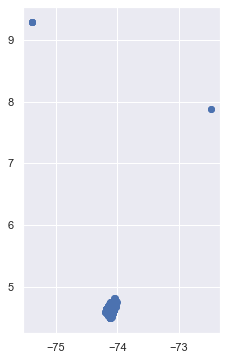

In [16]:
basehealth.geometry.plot(figsize=(12,6))

In [18]:
healthlocalidades = pd.DataFrame(basehealth.drop(columns=['index_right','geometry']))

In [19]:
healthlocalidades.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1607 entries, 0 to 1606
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   1607 non-null   int64  
 1   iddepto              1607 non-null   int64  
 2   nomdepto             1607 non-null   object 
 3   idmpio               1607 non-null   int64  
 4   nompio               1607 non-null   object 
 5   codigohabilitacion   1607 non-null   object 
 6   nombre               1607 non-null   object 
 7   nitsnit              1607 non-null   object 
 8   ese                  626 non-null    object 
 9   direccion            1607 non-null   object 
 10  direccionorig        1607 non-null   object 
 11  telefono             1607 non-null   object 
 12  najunombre           1607 non-null   object 
 13  numerosedeprincipal  1607 non-null   int64  
 14  latitude             1607 non-null   float64
 15  longitude            1607 non-null   f

In [20]:
healthlocalidades.Localidad.value_counts()

Usaquén               291
Suba                  202
Chapinero             167
Ciudad Bolivar        140
Teusaquillo           123
Engativá              107
Barrios Unidos         88
Fontibón               76
Rafael Uribe Uribe     75
Kennedy                73
Antonio Nariño         61
Puente Aranda          38
Santa Fe               31
Tunjuelito             30
Usme                   28
Los Mártires           24
Bosa                   20
San Cristobal          19
La Candelaria           4
Name: Localidad, dtype: int64

In [21]:
healthlocalidades.to_csv('../Datasets Clean/healthlocalidades.csv',index=False)